# Demo: Normal Distribution of Stock Ticker Data

This program retrieves stock price data using the Alpaca API and plots the data using Pandas. These plots demonstrate the distribution of daily stock closing prices compared to the expected normal probability distribution. 

## Import Dependencies

In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi

# Load .env environment variables
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

In [2]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

## Get 1 Year's Worth of Stock Price Data via Alpaca API Call and Read in as DataFrame 

In [3]:
# Set the IBM and Amazon tickers
ticker = ["IBM","AMZN"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp("2019-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Set limit_rows to 1000 to retreive the maximum amount of rows
limit_rows = 1000

# Get 1 year's worth of historical data for IBM and Amazon
df_ticker = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=limit_rows
).df

# Display sample data
df_ticker.head(10)

AMZN                                          \
                              open       high        low    close   volume   
time                                                                         
2019-05-01 00:00:00-04:00  1933.09  1943.6400  1910.5500  1911.29  2814558   
2019-05-02 00:00:00-04:00  1913.33  1921.5500  1881.8700  1901.72  3641665   
2019-05-03 00:00:00-04:00  1949.00  1964.4000  1936.0000  1961.76  5687567   
2019-05-06 00:00:00-04:00  1917.98  1959.0000  1910.5000  1950.29  4911645   
2019-05-07 00:00:00-04:00  1939.99  1949.1005  1903.3795  1922.58  5451477   
2019-05-08 00:00:00-04:00  1918.87  1935.3700  1910.0000  1916.85  3650183   
2019-05-09 00:00:00-04:00  1900.98  1909.4000  1876.0000  1900.01  4928658   
2019-05-10 00:00:00-04:00  1898.00  1903.7900  1856.0000  1889.98  5355441   
2019-05-13 00:00:00-04:00  1837.11  1846.5350  1818.0000  1822.62  5312153   
2019-05-14 00:00:00-04:00  1839.90  1852.4400  1815.7500  1840.05  4179780   

                              IBM                                       
                             open      high     low     close   volume  
time                                                                    
2019-05-01 00:00:00-04:00  140.55  141.8100  140.17  140.5700  2599918  
2019-05-02 00:00:00-04:00  140.50  141.2800  139.41  139.6400  2729143  
2019-05-03 00:00:00-04:00  139.70  141.0000  139.63  140.2800  1967352  
2019-05-06 00:00:00-04:00  138.30  140.6900  137.90  140.4000  2198347  
2019-05-07 00:00:00-04:00  139.15  139.5100  136.19  137.6200  4056178  
2019-05-08 00:00:00-04:00  137.77  138.7000  137.13  138.0000  2821862  
2019-05-09 00:00:00-04:00  134.89  135.5848  133.03  135.3295  3234633  
2019-05-10 00:00:00-04:00  134.88  135.7500  132.42  135.3400  3404234  
2019-05-13 00:00:00-04:00  133.28  133.5700  130.96  131.4050  3593432  
2019-05-14 00:00:00-04:00  131.82  134.3200  131.68  133.3400  2781032

## Pick closing prices and compute the daily returns

In [4]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of AMZN and IBM
df_closing_prices["AMZN"] = df_ticker["AMZN"]["close"]
df_closing_prices["IBM"] = df_ticker["IBM"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Compute daily returns
df_daily_returns = df_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns.head(10)

,AMZN,IBM
2019-05-02,-0.005007,-0.006616
2019-05-03,0.031571,0.004583
2019-05-06,-0.005847,0.000855
2019-05-07,-0.014208,-0.019801
2019-05-08,-0.002980,0.002761
2019-05-09,-0.008785,-0.019351
2019-05-10,-0.005279,0.000078
2019-05-13,-0.035641,-0.029075
2019-05-14,0.009563,0.014725
2019-05-15,0.016885,0.008025


In [5]:
# Generate descriptive statistics
df_daily_returns.describe()

,AMZN,IBM
count,253.000000,253.000000
mean,0.000906,-0.000287
std,0.019980,0.023596
min,-0.078818,-0.128507
25%,-0.008201,-0.008607
50%,0.000708,0.000595
75%,0.008786,0.009033
max,0.073153,0.112612


### Plot Distributions

<AxesSubplot:ylabel='Frequency'>

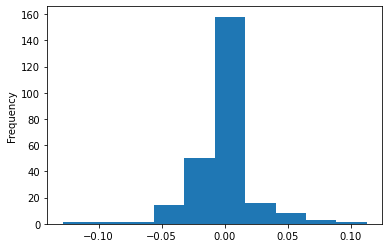

In [6]:
# Visualize distribution of IBM percent change in closing price using a histogram plot
df_daily_returns["IBM"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

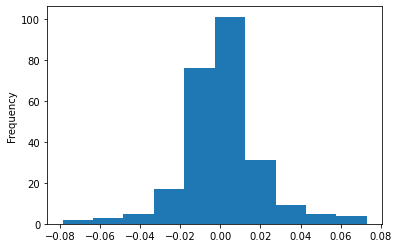

In [7]:
# Visualize distribution of Amazon percent change in closing price using a histogram plot
df_daily_returns["AMZN"].plot.hist()

<AxesSubplot:ylabel='Density'>

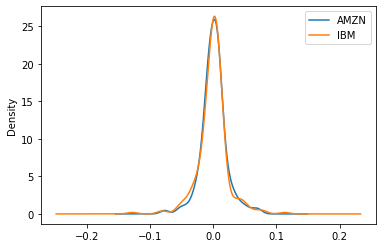

In [8]:
# Visualize the distribution of percent change in closing price for both stocks using a density plot
df_daily_returns.plot.density()